#### YOLO 
- You Only Look Once
- One Stage Detector 
    - 2015.06 : YOLO v1 
    - 2015.12 : SSD 
    - 2016.12 : YOLO v2 
    - Feature Pyramid Network 
    - 2017.08 : RetinaNet 
    - 2018.04 : YOLO v3 
    - 2019.11 : EfficientNet 
    - 2020.04 : YOLO v4
- DarkNet: C Deep Learning Frame work 

#### YOLO Version 
- V1 : Fast detection time but low accuracy
- V2 : Improving both execution time and performance
- V3 : Execution time is slower than v2 but Significantly improved performance
- V4 : Execution time is faster than v3 and Improving  performance

#### YOLO v1 
- YOLO v1 Loss 
- **Bounding Box 중심 x, y의 좌표 Loss** 
    - 예측 좌표 x, y값과 Ground Truth 좌표, x, y 값의 오차 제곱을 기반 
    - 모든 cell의 2개의 Bbox(98개 Bbox) 중에 예측 Bbox를 책임지는 Bbox만 Loss 계산 
    - 98개의 Bbox 중 object 예측을 책임지는 Bbox 만 1 나머지는 0 
$$\lambda{coord}
\sum_{\text{i=0}}^{{s^2}}
\sum_{\text{j=0}}^{{B}}
\mathbb{1_{ij}^\text{obj}}[(x_i -\hat{x_i})^2 + (y_i -\hat{y_i})^2]$$
- **Bounding Box 너비 너비 w 높이 h Loss**
    - 예측 너비, 높이 값과 Ground Truth 너비, 높이 값의 오차제곱을 기반으로 하되 크기가 큰 오브젝트의 경우 오류가 상대적으로 커짐을 제약하기 위해서 제곱근을 취한다. 
$$\lambda{coord}
\sum_{\text{i=0}}^{{s^2}}
\sum_{\text{j=0}}^{{B}}
\mathbb{1_{ij}^
\text{obj}}(\sqrt{w_i} -\sqrt{\hat{w_i}})^2 + (\sqrt{y_i} -\sqrt{\hat{y_i}})^2$$

- **Confidence Score Loss**  
$$
\sum_{\text{i=0}}^{{s^2}}
\sum_{\text{j=0}}^{{B}}
\mathbb{1_{ij}^\text{obj}}
(C_i - {\hat{C_i}})^2 + \lambda{coord} 
\sum_{\text{i=0}}^{{s^2}}
\sum_{\text{j=0}}^{{B}}
\mathbb{1_{ij}^\text{noobj}}(C_i -\hat{C_i})^2$$

- **Classification Loss**  
$$\sum_\text{i=0}^{s^{2}}\mathbb{1_i^\text{obj}}
\sum_{c\in{}(Classes)}
(P_i(c) - \hat{p_i}(C))^2
$$ 

#### YOLO v2 
- Batch Normalization 
- High Resolution Classifier : Network Classfier 단은 보다 높은 resolution(448 * 448)로 Fine tunning 
- 13  * 13 feature map 기반에서 개별 Grid cell별 5개의 Anchor box 에서 object detection 



In [ ]:
import cv2 
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from google.colab import drive 
from google.colab.patches import cv2_imshow

In [ ]:
!mkdir ./data
!mkdir ./pretrained


In [ ]:
!echo "##### downloading pretrained yolo/tiny-yolo weight file and config file"
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
!wget -O /content/pretrained/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O /content/pretrained/yolov3.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3.cfg?raw=true 

!wget -O /content/pretrained/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
!wget -O /content/pretrained/yolov3-tiny.cfg https://github.com/pjreddie/darknet/blob/master/cfg/yolov3-tiny.cfg?raw=true

!ls /content/pretrained
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

In [ ]:
weights_path = '/content/pretrained/yolov3.weights'
config_path =  '/content/pretrained/yolov3.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [ ]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [ ]:
layer_names = cv_net_yolo.getLayerNames()
print(f"Yolo v3 layer name {layer_names}")
print(f"Yolo output layer id : {cv_net_yolo.getUnconnectedOutLayers()}")
print(f"Final outpyt layer name : {[layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]}")


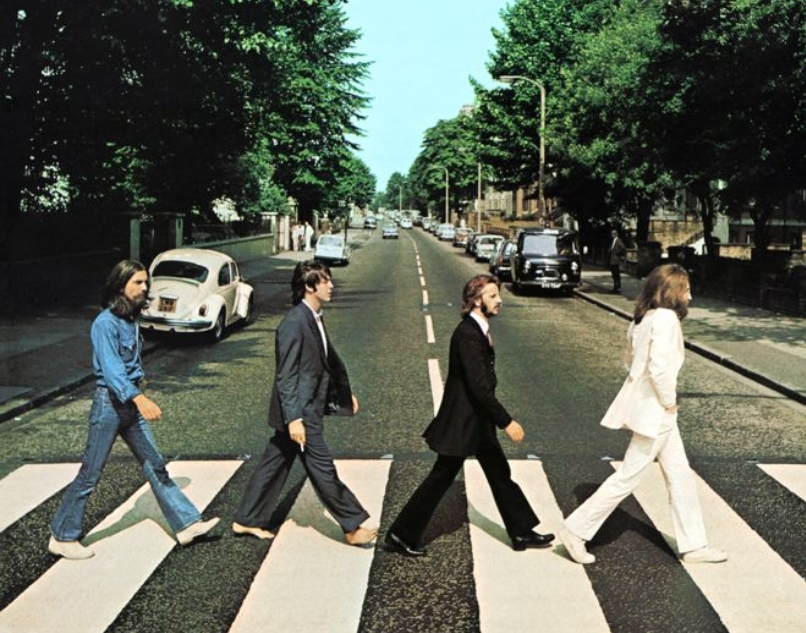

In [ ]:
image = cv2.imread("./data/beatles01.jpg")
cv2_imshow(image)

In [ ]:
layer_names = cv_net_yolo.getLayerNames()
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
print(outlayer_names)

cv_net_yolo.setInput(cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))

cv_outs = cv_net_yolo.forward(outlayer_names)
print('cv_outs type:', type(cv_outs), 'cv_outs element count:', len(cv_outs))
print(cv_outs[0].shape, cv_outs[1].shape, cv_outs[2].shape)
print(cv_outs)



['yolo_82', 'yolo_94', 'yolo_106']
cv_outs type: <class 'list'> cv_outs element count: 3
(507, 85) (2028, 85) (8112, 85)
[array([[0.03803749, 0.0470234 , 0.3876816 , ..., 0.        , 0.        ,
        0.        ],
       [0.04705836, 0.03385845, 0.2689603 , ..., 0.        , 0.        ,
        0.        ],
       [0.04941482, 0.03791986, 0.7151826 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9585798 , 0.9460585 , 0.35046625, ..., 0.        , 0.        ,
        0.        ],
       [0.96015006, 0.9630715 , 0.29724196, ..., 0.        , 0.        ,
        0.        ],
       [0.9663636 , 0.9657401 , 0.79356086, ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.01637367, 0.02457962, 0.04684627, ..., 0.        , 0.        ,
        0.        ],
       [0.01678773, 0.01458679, 0.46203217, ..., 0.        , 0.        ,
        0.        ],
       [0.02219823, 0.01376948, 0.0662718 , ..., 0.        , 0.        ,
        0.        ],
   

In [ ]:
import numpy as np

rows = image.shape[0]
cols = image.shape[1]

conf_threshold = 0.5
nms_threshold = 0.4

green_color=(0, 255, 0)
red_color=(0, 0, 255)

class_ids = []
confidences = []
boxes = []

for ix, output in enumerate(cv_outs):
    print('output shape:', output.shape)

    for jx, detection in enumerate(output):
        class_scores = detection[5:]
        class_id = np.argmax(class_scores)
        confidence = class_scores[class_id]

        if confidence > conf_threshold:
            print('ix:', ix, 'jx:', jx, 'class_id', class_id, 'confidence:', confidence)
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)
            left = int(center_x - width / 2)
            top = int(center_y - height / 2)
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([left, top, width, height])

output shape: (507, 85)
ix: 0 jx: 319 class_id 0 confidence: 0.9317017
ix: 0 jx: 328 class_id 0 confidence: 0.96232384
ix: 0 jx: 334 class_id 0 confidence: 0.9984486
ix: 0 jx: 343 class_id 0 confidence: 0.9978433
output shape: (2028, 85)
ix: 1 jx: 831 class_id 2 confidence: 0.8169964
ix: 1 jx: 955 class_id 2 confidence: 0.8472691
ix: 1 jx: 1262 class_id 0 confidence: 0.9877816
ix: 1 jx: 1280 class_id 0 confidence: 0.99840033
ix: 1 jx: 1295 class_id 0 confidence: 0.6916561
ix: 1 jx: 1313 class_id 0 confidence: 0.9205806
output shape: (8112, 85)
ix: 2 jx: 2883 class_id 2 confidence: 0.9077368
ix: 2 jx: 2886 class_id 2 confidence: 0.63324535
ix: 2 jx: 3048 class_id 2 confidence: 0.9412014
ix: 2 jx: 3051 class_id 2 confidence: 0.615405
ix: 2 jx: 3184 class_id 2 confidence: 0.95041
ix: 2 jx: 3214 class_id 2 confidence: 0.9064125
ix: 2 jx: 3373 class_id 2 confidence: 0.68998003
ix: 2 jx: 3394 class_id 0 confidence: 0.76407045
